# **Collection of data from Twitter**

In [1]:
import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import datetime
import csv
import pandas as pd
import regex as re
from shutil import copyfile
import csv
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
# This handles Twitter authetification and the connection to Twitter Streaming API
consumerKey = "OzNzNQ7J2nqXyQwTIUNHfLzLa"
consumerSecret = "RZVjQ1aij9O9Fx6dreD49v7esLUjphBBsAKsWLibaQr3poRaL8"
accessToken = "1327243608622202882-JCmI0IYN7SYdkS0w4MU1vLgOJ31nZM"
accessTokenSecret = "xu2c07oJ5IWOeHdLQ4bNOTtosN6nLfDo6P2qlrSdlTDNG"

In [3]:
auth = OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(auth)

In [4]:
search_words = "Virat"
new_search = search_words + " -filter:retweets"
date_since = "2019-09-01"
date_until = "2022-04-21"

In [5]:
tweets = tweepy.Cursor(api.search, q = search_words, lang = "es", since = date_since, until=date_until).items()

In [6]:
final_data = []

for tweet in tweets:
    u_n = api.get_user(tweet.user.screen_name)
    print("name: " + tweet.user.screen_name)
    print("description: " + u_n.description)
    print("statuses_count: " + str(u_n.statuses_count))
    print("friends_count: " + str(u_n.friends_count))
    print("followers_count: " + str(u_n.followers_count))
    
    final_data.append([tweet.user.name,tweet.user.location, tweet.created_at, tweet.text, tweet.favorite_count, tweet.retweet_count, u_n.description, u_n.statuses_count, u_n.friends_count, u_n.followers_count])

print(final_data)

RateLimitError: ignored

In [ ]:
tweet_text = pd.DataFrame(data=final_data, columns=["User name","Location", "Time", "Tweet", "Favorite Count", "Retweet Count", "User description", "User status count", "User friends count", "User followers count"])
tweet_text.to_csv("samp_loc_tweets_spain.csv")

# **Translating Spanish data**

In [ ]:
!pip install googletrans==4.0.0-rc1

     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 1.3 MB 48.6 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 65 kB 4.1 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17416 sha256=9e8d98f9a560de0325671e12bd073d35fca2b4b43bc729c950169fc4d05f26ba
  Stored in directory: /root/.cache/pip/wheels/43/34/00/4fe71786ea6d12314b29037620c36d857e5d104ac2748bf82a
Successfully built googletrans


In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
df = pd.read_csv("/content/samp_loc_tweets_spain.csv",encoding= 'unicode_escape')
df.head()

,Unnamed: 0,User name,Location,Time,Tweet,Favorite Count,Retweet Count,User description,User status count,User friends count,User followers count
0,0,alejandro vela,"Aguascalientes, MÃ©xico",2022-04-17 19:37:38,"RT @cancun_fc: AficiÃ³n, este jueves el AndrÃ©...",0,2,"Dios,Familia,Futbol=Felicidad In...",6732,1668,39023
1,1,CancÃºn FC,"CancÃºn, Quintana Roo",2022-04-17 19:27:27,"AficiÃ³n, este jueves el AndrÃ©s se pinta de C...",14,2,Equipo de fÃºtbol de la @LigaMXExpansion en MÃ...,5661,100,15554
2,2,CancÃºn FC,"CancÃºn, Quintana Roo",2022-04-17 19:26:32,https://t.co/ehwE29dkHd - Compra de boletos en...,5,1,Equipo de fÃºtbol de la @LigaMXExpansion en MÃ...,5661,100,15554
3,3,CancÃºn FC,"CancÃºn, Quintana Roo",2022-04-17 19:23:49,Jueves 21 de abril - 19:00 horas \n\nBoletos $...,21,5,Equipo de fÃºtbol de la @LigaMXExpansion en MÃ...,5661,100,15554
4,4,edgar ACHE,NaN,2022-04-17 17:40:09,RT @LigaMXExpansion: Listos los horarios y dÃ­...,0,24,#nacimosparanomorir\nfan del deporte guanajuat...,3153,1567,203


In [ ]:
translated_tweets = []

for i in range(len(df)):
  translated_tweets.append(translator.translate(df['Tweet'][i]).text)

translated_tweets[0]

"RT @Cancun_FC: Hobby, this Thursday the AndrÃ © s is painted FC Ðÿ '™\n\nIPREST WITH ANY Official FC Garmear to redeem Tâ € |"

In [ ]:
translated_desc = []

for i in range(len(df)):
  translated_desc.append(translator.translate(df['User description'][i]).text)

translated_desc[0]

'God, Family, Football = happiness Instagram: Alexvelag'

In [ ]:
translated_location = []

for i in range(len(df)):
  translated_location.append(translator.translate(df['Location'][i]).text)

translated_location[0]

'Aguascalientes, MÃ © Xico'

In [ ]:
df['Translated_tweet'] = translated_tweets
df['Translated_user_desc'] = translated_desc
df['Translated_location'] = translated_location

In [ ]:
df

,Unnamed: 0,User name,Location,Time,Tweet,Favorite Count,Retweet Count,User description,User status count,User friends count,User followers count,Translated_tweet,Translated_user_desc,Translated_location
0,0,alejandro vela,"Aguascalientes, MÃ©xico",2022-04-17 19:37:38,"RT @cancun_fc: AficiÃ³n, este jueves el AndrÃ©...",0,2,"Dios,Familia,Futbol=Felicidad In...",6732,1668,39023,"RT @Cancun_FC: Hobby, this Thursday the AndrÃ ...","God, Family, Football = happiness Instagram: A...","Aguascalientes, MÃ © Xico"
1,1,CancÃºn FC,"CancÃºn, Quintana Roo",2022-04-17 19:27:27,"AficiÃ³n, este jueves el AndrÃ©s se pinta de C...",14,2,Equipo de fÃºtbol de la @LigaMXExpansion en MÃ...,5661,100,15554,"Hobby, this Thursday the AndrÃ © s is painted ...",@Ligamxexpansion methodbol equipment in Mexico...,"Cancin, Quintana Roo"
2,2,CancÃºn FC,"CancÃºn, Quintana Roo",2022-04-17 19:26:32,https://t.co/ehwE29dkHd - Compra de boletos en...,5,1,Equipo de fÃºtbol de la @LigaMXExpansion en MÃ...,5661,100,15554,https://t.co/ehwe29dkhd - buy tickets online Ð...,@Ligamxexpansion methodbol equipment in Mexico...,"Cancin, Quintana Roo"
3,3,CancÃºn FC,"CancÃºn, Quintana Roo",2022-04-17 19:23:49,Jueves 21 de abril - 19:00 horas \n\nBoletos $...,21,5,Equipo de fÃºtbol de la @LigaMXExpansion en MÃ...,5661,100,15554,"Thursday, April 21 - 19:00 hours\n\nTickets $ ...",@Ligamxexpansion methodbol equipment in Mexico...,"Cancin, Quintana Roo"
4,4,edgar ACHE,NaN,2022-04-17 17:40:09,RT @LigaMXExpansion: Listos los horarios y dÃ­...,0,24,#nacimosparanomorir\nfan del deporte guanajuat...,3153,1567,203,RT @LIGAMXEXPANSION: Ready schedules and days ...,#Nacosparanomorir.\nGranajuatense sport fan\nÐ...,In
5,5,CancÃºn FC,"CancÃºn, Quintana Roo",2022-04-17 15:04:16,Â¡Buenos dÃ­as a todos!ð\n\nRecuerden que e...,13,1,Equipo de fÃºtbol de la @LigaMXExpansion en MÃ...,5661,100,15554,Good gifts to all! Ðÿ '™\n\nRemember that Thur...,@Ligamxexpansion methodbol equipment in Mexico...,"Cancin, Quintana Roo"
6,6,Ada Xanat LÃ³pez PÃ©rez,Mexico,2022-04-17 04:14:13,RT @Ro_Bonilla: Â¡Se busca campeÃ³n!\n\nToda l...,0,1,ð»ðºð°|| Locutora Certificada\nReportera...,85148,1716,1793,RT @RO_BONILLA: The champion search!\n\nAll th...,"Ðÿ ""» Ðÿ ""ºÐÿ"" ° ||Certified announcement\nRep...",Mexico
7,7,Jorge RomÃ¡n Bonilla Waldo,"Puebla, MÃ©xico",2022-04-17 03:46:40,Â¡Se busca campeÃ³n!\n\nToda la fase final del...,1,1,Corresponsal en @HiSportsTV\nReportero en @Dym...,13374,349,579,The champion search!\n\nAll the final phase de...,Correspondent in @hisportstv.\nReporter in @ D...,"Puebla, MÃ © Xico"
8,8,ERIK CORONA.,"Iztapalapa, Distrito Federal",2022-04-17 03:34:47,RT @LigaMXExpansion: Listos los horarios y dÃ­...,0,24,"SOY ALEGRE , TÃMIDO y realistas y\nodio del s...",87397,1124,476,RT @LIGAMXEXPANSION: Ready schedules and days ...,"I am cheerful, I measure and realistic and\nHa...","Iztapalapa, Federal District"
9,9,Diario de Q. Roo,"Chetumal, Q.R.",2022-04-17 03:04:56,"#DiarioDeQuintanaRoo \nâTepaâ, rival de Ca...",0,0,"Diario de Quintana Roo, integrado a la vida Qu...",104700,200,14730,"#Diariodequintanaroo.\nâ € œTepaâ €, FC Charac...","Diario de Quintana Roo, integrated into Quinta...","Chetumal, Q.R."


In [ ]:
df.to_csv("Translated_tweets.csv")

# **Pre-Processing of translated data**

In [ ]:
#Reading the csv file
df = pd.read_csv('Translated_tweets.csv')

#Making a copy to store all preprocessed values
#copyfile('tweets.csv', 'processed_tweets.csv')

#Extracting all required values into respective lists
tweets = df['Translated_tweet']
date_time = df['Time']
location = df['Location']
ori = df['Tweet']

In [ ]:
#STEP 1: Removing mentions and urls from tweet messages
tweets_without_mention = []
for message in tweets:
    tweets_without_mention.append(re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "",message))

In [ ]:
#STEP 2: Removing consecutive non-ascii characters
tweets_without_non_ascii = []
for message in tweets_without_mention:
    tweets_without_non_ascii.append(re.sub(r'[^\x00-\x7F]+',' ', message))

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#STEP 3: Tokenization and remove punctuations
tweets_tokens = []
for message in tweets_without_non_ascii:
    words = word_tokenize(message)
    words_without_punctuation = [word for word in words if word.isalnum()]
    tweets_tokens.append(words_without_punctuation)

In [ ]:
#STEP 4: Removing stop words
stop_words = set(stopwords.words('english'))
tweets_without_stop_words = [] 
  
for i in tweets_tokens:
    temp = []
    for j in i:
        if j not in stop_words: 
            temp.append(j)
    tweets_without_stop_words.append(temp)

In [ ]:
#STEP 5: Removing emoticons from tweets
tweets_without_emoticons=[]
for message in tweets_without_stop_words:
    temp=[]
    for word in message:
        to_remove_pattern = re.compile(pattern = "["
                                       u"\U0001F600-\U0001F64F"  # emoticons
                                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                       "]+", flags = re.UNICODE)
        temp.append(to_remove_pattern.sub(r'',word))
    tweets_without_emoticons.append(temp)

In [ ]:
#STEP 6: Final processed tweet messages
processed_tweets= []
for message in tweets_without_emoticons:
    s = " "
    s = s.join(message)
    processed_tweets.append(s)

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,User name,Location,Time,Tweet,Favorite Count,Retweet Count,User description,User status count,User friends count,User followers count,Translated_tweet,Translated_user_desc,Translated_location
0,0,0,alejandro vela,"Aguascalientes, MÃ©xico",2022-04-17 19:37:38,"RT @cancun_fc: AficiÃ³n, este jueves el AndrÃ©...",0,2,"Dios,Familia,Futbol=Felicidad In...",6732,1668,39023,"RT @Cancun_FC: Hobby, this Thursday the AndrÃ ...","God, Family, Football = happiness Instagram: A...","Aguascalientes, MÃ © Xico"
1,1,1,CancÃºn FC,"CancÃºn, Quintana Roo",2022-04-17 19:27:27,"AficiÃ³n, este jueves el AndrÃ©s se pinta de C...",14,2,Equipo de fÃºtbol de la @LigaMXExpansion en MÃ...,5661,100,15554,"Hobby, this Thursday the AndrÃ © s is painted ...",@Ligamxexpansion methodbol equipment in Mexico...,"Cancin, Quintana Roo"
2,2,2,CancÃºn FC,"CancÃºn, Quintana Roo",2022-04-17 19:26:32,https://t.co/ehwE29dkHd - Compra de boletos en...,5,1,Equipo de fÃºtbol de la @LigaMXExpansion en MÃ...,5661,100,15554,https://t.co/ehwe29dkhd - buy tickets online Ð...,@Ligamxexpansion methodbol equipment in Mexico...,"Cancin, Quintana Roo"
3,3,3,CancÃºn FC,"CancÃºn, Quintana Roo",2022-04-17 19:23:49,Jueves 21 de abril - 19:00 horas \n\nBoletos $...,21,5,Equipo de fÃºtbol de la @LigaMXExpansion en MÃ...,5661,100,15554,"Thursday, April 21 - 19:00 hours\n\nTickets $ ...",@Ligamxexpansion methodbol equipment in Mexico...,"Cancin, Quintana Roo"
4,4,4,edgar ACHE,NaN,2022-04-17 17:40:09,RT @LigaMXExpansion: Listos los horarios y dÃ­...,0,24,#nacimosparanomorir\nfan del deporte guanajuat...,3153,1567,203,RT @LIGAMXEXPANSION: Ready schedules and days ...,#Nacosparanomorir.\nGranajuatense sport fan\nÐ...,In
5,5,5,CancÃºn FC,"CancÃºn, Quintana Roo",2022-04-17 15:04:16,Â¡Buenos dÃ­as a todos!ð\n\nRecuerden que e...,13,1,Equipo de fÃºtbol de la @LigaMXExpansion en MÃ...,5661,100,15554,Good gifts to all! Ðÿ '™\n\nRemember that Thur...,@Ligamxexpansion methodbol equipment in Mexico...,"Cancin, Quintana Roo"
6,6,6,Ada Xanat LÃ³pez PÃ©rez,Mexico,2022-04-17 04:14:13,RT @Ro_Bonilla: Â¡Se busca campeÃ³n!\n\nToda l...,0,1,ð»ðºð°|| Locutora Certificada\nReportera...,85148,1716,1793,RT @RO_BONILLA: The champion search!\n\nAll th...,"Ðÿ ""» Ðÿ ""ºÐÿ"" ° ||Certified announcement\nRep...",Mexico
7,7,7,Jorge RomÃ¡n Bonilla Waldo,"Puebla, MÃ©xico",2022-04-17 03:46:40,Â¡Se busca campeÃ³n!\n\nToda la fase final del...,1,1,Corresponsal en @HiSportsTV\nReportero en @Dym...,13374,349,579,The champion search!\n\nAll the final phase de...,Correspondent in @hisportstv.\nReporter in @ D...,"Puebla, MÃ © Xico"
8,8,8,ERIK CORONA.,"Iztapalapa, Distrito Federal",2022-04-17 03:34:47,RT @LigaMXExpansion: Listos los horarios y dÃ­...,0,24,"SOY ALEGRE , TÃMIDO y realistas y\nodio del s...",87397,1124,476,RT @LIGAMXEXPANSION: Ready schedules and days ...,"I am cheerful, I measure and realistic and\nHa...","Iztapalapa, Federal District"
9,9,9,Diario de Q. Roo,"Chetumal, Q.R.",2022-04-17 03:04:56,"#DiarioDeQuintanaRoo \nâTepaâ, rival de Ca...",0,0,"Diario de Quintana Roo, integrado a la vida Qu...",104700,200,14730,"#Diariodequintanaroo.\nâ € œTepaâ €, FC Charac...","Diario de Quintana Roo, integrated into Quinta...","Chetumal, Q.R."


In [ ]:
df['Sno'] = [i for i in range(1,len(tweets_without_mention)+1)]
df['Processed_tweet'] = processed_tweets

df

,Unnamed: 0,Unnamed: 0.1,User name,Location,Time,Tweet,Favorite Count,Retweet Count,User description,User status count,User friends count,User followers count,Translated_tweet,Translated_user_desc,Translated_location,Sno,Processed_tweet
0,0,0,alejandro vela,"Aguascalientes, MÃ©xico",2022-04-17 19:37:38,"RT @cancun_fc: AficiÃ³n, este jueves el AndrÃ©...",0,2,"Dios,Familia,Futbol=Felicidad In...",6732,1668,39023,"RT @Cancun_FC: Hobby, this Thursday the AndrÃ ...","God, Family, Football = happiness Instagram: A...","Aguascalientes, MÃ © Xico",1,RT Hobby Thursday Andr painted FC IPREST WITH ...
1,1,1,CancÃºn FC,"CancÃºn, Quintana Roo",2022-04-17 19:27:27,"AficiÃ³n, este jueves el AndrÃ©s se pinta de C...",14,2,Equipo de fÃºtbol de la @LigaMXExpansion en MÃ...,5661,100,15554,"Hobby, this Thursday the AndrÃ © s is painted ...",@Ligamxexpansion methodbol equipment in Mexico...,"Cancin, Quintana Roo",2,Hobby Thursday Andr painted FC FC Presso FC Ca...
2,2,2,CancÃºn FC,"CancÃºn, Quintana Roo",2022-04-17 19:26:32,https://t.co/ehwE29dkHd - Compra de boletos en...,5,1,Equipo de fÃºtbol de la @LigaMXExpansion en MÃ...,5661,100,15554,https://t.co/ehwe29dkhd - buy tickets online Ð...,@Ligamxexpansion methodbol equipment in Mexico...,"Cancin, Quintana Roo",3,buy tickets online live cancun Cancunfc somosc...
3,3,3,CancÃºn FC,"CancÃºn, Quintana Roo",2022-04-17 19:23:49,Jueves 21 de abril - 19:00 horas \n\nBoletos $...,21,5,Equipo de fÃºtbol de la @LigaMXExpansion en MÃ...,5661,100,15554,"Thursday, April 21 - 19:00 hours\n\nTickets $ ...",@Ligamxexpansion methodbol equipment in Mexico...,"Cancin, Quintana Roo",4,Thursday April 21 hours Tickets 50 pesos Humpb...
4,4,4,edgar ACHE,NaN,2022-04-17 17:40:09,RT @LigaMXExpansion: Listos los horarios y dÃ­...,0,24,#nacimosparanomorir\nfan del deporte guanajuat...,3153,1567,203,RT @LIGAMXEXPANSION: Ready schedules and days ...,#Nacosparanomorir.\nGranajuatense sport fan\nÐ...,In,5,RT Ready schedules days reclassification Mi rC...
5,5,5,CancÃºn FC,"CancÃºn, Quintana Roo",2022-04-17 15:04:16,Â¡Buenos dÃ­as a todos!ð\n\nRecuerden que e...,13,1,Equipo de fÃºtbol de la @LigaMXExpansion en MÃ...,5661,100,15554,Good gifts to all! Ðÿ '™\n\nRemember that Thur...,@Ligamxexpansion methodbol equipment in Mexico...,"Cancin, Quintana Roo",6,Good gifts Remember Thursday appointment Let g...
6,6,6,Ada Xanat LÃ³pez PÃ©rez,Mexico,2022-04-17 04:14:13,RT @Ro_Bonilla: Â¡Se busca campeÃ³n!\n\nToda l...,0,1,ð»ðºð°|| Locutora Certificada\nReportera...,85148,1716,1793,RT @RO_BONILLA: The champion search!\n\nAll th...,"Ðÿ ""» Ðÿ ""ºÐÿ"" ° ||Certified announcement\nRep...",Mexico,7,RT The champion search All final phase del gri...
7,7,7,Jorge RomÃ¡n Bonilla Waldo,"Puebla, MÃ©xico",2022-04-17 03:46:40,Â¡Se busca campeÃ³n!\n\nToda la fase final del...,1,1,Corresponsal en @HiSportsTV\nReportero en @Dym...,13374,349,579,The champion search!\n\nAll the final phase de...,Correspondent in @hisportstv.\nReporter in @ D...,"Puebla, MÃ © Xico",8,The champion search All final phase del gritam...
8,8,8,ERIK CORONA.,"Iztapalapa, Distrito Federal",2022-04-17 03:34:47,RT @LigaMXExpansion: Listos los horarios y dÃ­...,0,24,"SOY ALEGRE , TÃMIDO y realistas y\nodio del s...",87397,1124,476,RT @LIGAMXEXPANSION: Ready schedules and days ...,"I am cheerful, I measure and realistic and\nHa...","Iztapalapa, Federal District",9,RT Ready schedules days reclassification Mi rC...
9,9,9,Diario de Q. Roo,"Chetumal, Q.R.",2022-04-17 03:04:56,"#DiarioDeQuintanaRoo \nâTepaâ, rival de Ca...",0,0,"Diario de Quintana Roo, integrado a la vida Qu...",104700,200,14730,"#Diariodequintanaroo.\nâ € œTepaâ €, FC Charac...","Diario de Quintana Roo, integrated into Quinta...","Chetumal, Q.R.",10,Diariodequintanaroo Tepa FC Character Rival In...


In [ ]:
df.to_csv("Final_processed_tweets.csv")

In [ ]:
df['Processed_tweet'][0]

'RT Hobby Thursday Andr painted FC IPREST WITH ANY Official FC Garmear redeem T'

# **Sentiment analysis on processed data**

In [ ]:
!pip install vaderSentiment 

     |████████████████████████████████| 125 kB 9.0 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
def sentiment_scores(sentence):
  sid_obj = SentimentIntensityAnalyzer()
 
  sentiment_dict = sid_obj.polarity_scores(sentence)
     
  #print("Overall sentiment dictionary is : ", sentiment_dict)
  #print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
  #print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
  #print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")

  #print("Sentence Overall Rated As", end = " ")

  # decide sentiment as positive, negative and neutral
  if sentiment_dict['compound'] >= 0.05 :
      #print("Positive")
      return "Positive"

  elif sentiment_dict['compound'] <= - 0.05 :
      #print("Negative")
      return "Negative"

  else :
      #print("Neutral")
      return "Neutral"

In [ ]:
final = []

for i in df['Sno']:
    final.append(sentiment_scores(df['Processed_tweet'][i-1]))

final

['Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive']

In [ ]:
df['Sentiments'] = final

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,User name,Location,Time,Tweet,Favorite Count,Retweet Count,User description,User status count,User friends count,User followers count,Translated_tweet,Translated_user_desc,Translated_location,Sno,Processed_tweet,Sentiments
0,0,0,alejandro vela,"Aguascalientes, MÃ©xico",2022-04-17 19:37:38,"RT @cancun_fc: AficiÃ³n, este jueves el AndrÃ©...",0,2,"Dios,Familia,Futbol=Felicidad In...",6732,1668,39023,"RT @Cancun_FC: Hobby, this Thursday the AndrÃ ...","God, Family, Football = happiness Instagram: A...","Aguascalientes, MÃ © Xico",1,RT Hobby Thursday Andr painted FC IPREST WITH ...,Neutral
1,1,1,CancÃºn FC,"CancÃºn, Quintana Roo",2022-04-17 19:27:27,"AficiÃ³n, este jueves el AndrÃ©s se pinta de C...",14,2,Equipo de fÃºtbol de la @LigaMXExpansion en MÃ...,5661,100,15554,"Hobby, this Thursday the AndrÃ © s is painted ...",@Ligamxexpansion methodbol equipment in Mexico...,"Cancin, Quintana Roo",2,Hobby Thursday Andr painted FC FC Presso FC Ca...,Neutral
2,2,2,CancÃºn FC,"CancÃºn, Quintana Roo",2022-04-17 19:26:32,https://t.co/ehwE29dkHd - Compra de boletos en...,5,1,Equipo de fÃºtbol de la @LigaMXExpansion en MÃ...,5661,100,15554,https://t.co/ehwe29dkhd - buy tickets online Ð...,@Ligamxexpansion methodbol equipment in Mexico...,"Cancin, Quintana Roo",3,buy tickets online live cancun Cancunfc somosc...,Neutral
3,3,3,CancÃºn FC,"CancÃºn, Quintana Roo",2022-04-17 19:23:49,Jueves 21 de abril - 19:00 horas \n\nBoletos $...,21,5,Equipo de fÃºtbol de la @LigaMXExpansion en MÃ...,5661,100,15554,"Thursday, April 21 - 19:00 hours\n\nTickets $ ...",@Ligamxexpansion methodbol equipment in Mexico...,"Cancin, Quintana Roo",4,Thursday April 21 hours Tickets 50 pesos Humpb...,Positive
4,4,4,edgar ACHE,NaN,2022-04-17 17:40:09,RT @LigaMXExpansion: Listos los horarios y dÃ­...,0,24,#nacimosparanomorir\nfan del deporte guanajuat...,3153,1567,203,RT @LIGAMXEXPANSION: Ready schedules and days ...,#Nacosparanomorir.\nGranajuatense sport fan\nÐ...,In,5,RT Ready schedules days reclassification Mi rC...,Positive
5,5,5,CancÃºn FC,"CancÃºn, Quintana Roo",2022-04-17 15:04:16,Â¡Buenos dÃ­as a todos!ð\n\nRecuerden que e...,13,1,Equipo de fÃºtbol de la @LigaMXExpansion en MÃ...,5661,100,15554,Good gifts to all! Ðÿ '™\n\nRemember that Thur...,@Ligamxexpansion methodbol equipment in Mexico...,"Cancin, Quintana Roo",6,Good gifts Remember Thursday appointment Let g...,Positive
6,6,6,Ada Xanat LÃ³pez PÃ©rez,Mexico,2022-04-17 04:14:13,RT @Ro_Bonilla: Â¡Se busca campeÃ³n!\n\nToda l...,0,1,ð»ðºð°|| Locutora Certificada\nReportera...,85148,1716,1793,RT @RO_BONILLA: The champion search!\n\nAll th...,"Ðÿ ""» Ðÿ ""ºÐÿ"" ° ||Certified announcement\nRep...",Mexico,7,RT The champion search All final phase del gri...,Positive
7,7,7,Jorge RomÃ¡n Bonilla Waldo,"Puebla, MÃ©xico",2022-04-17 03:46:40,Â¡Se busca campeÃ³n!\n\nToda la fase final del...,1,1,Corresponsal en @HiSportsTV\nReportero en @Dym...,13374,349,579,The champion search!\n\nAll the final phase de...,Correspondent in @hisportstv.\nReporter in @ D...,"Puebla, MÃ © Xico",8,The champion search All final phase del gritam...,Positive
8,8,8,ERIK CORONA.,"Iztapalapa, Distrito Federal",2022-04-17 03:34:47,RT @LigaMXExpansion: Listos los horarios y dÃ­...,0,24,"SOY ALEGRE , TÃMIDO y realistas y\nodio del s...",87397,1124,476,RT @LIGAMXEXPANSION: Ready schedules and days ...,"I am cheerful, I measure and realistic and\nHa...","Iztapalapa, Federal District",9,RT Ready schedules days reclassification Mi rC...,Positive
9,9,9,Diario de Q. Roo,"Chetumal, Q.R.",2022-04-17 03:04:56,"#DiarioDeQuintanaRoo \nâTepaâ, rival de Ca...",0,0,"Diario de Quintana Roo, integrado a la vida Qu...",104700,200,14730,"#Diariodequintanaroo.\nâ € œTepaâ €, FC Charac...","Diario de Quintana Roo, integrated into Quinta...","Chetumal, Q.R.",10,Diariodequintanaroo Tepa FC Character Rival In...,Neutral


In [ ]:
df.to_csv("Sentiment_analysis_tweets.csv")

In [ ]:
m1 = Counter(final)
m1

Counter({'Neutral': 8, 'Positive': 8})

<BarContainer object of 2 artists>

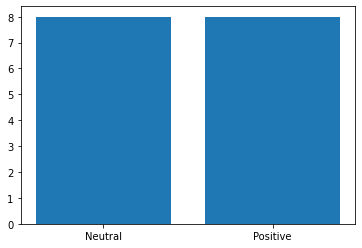

In [ ]:
keys1 = m1.keys()
values1 = m1.values()

plt.bar(keys1, values1)